$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 4: Digital filter project by sampling in frequency method

### Part 1: Bandpass filter

The filter must allow the passing of the frequency components between $300$ and $400\ Hz$ and attenuate the others. This filter has to be made using the sampling in frequency method, so we will model its desired format $H(e^{j\omega})$ assuming a sampling frequency of $f_S = 2\ kHz$. In the $\omega$ domain, its limits must be:

$$
\omega_{c_1} = \dfrac{2\pi 300}{2000} = 0,3\pi\  rad
$$

$$
\omega_{c_2} = \dfrac{2\pi 500}{2000} = 0,5\pi\ rad
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy import signal

In [13]:
def IdealFilter(n):
    H = np.zeros(len(n))
    for i in range(len(n)):
        if(n[i] >= ω_c1 and n[i] <= ω_c2):
            H[i] = 1
            H[len(n) - i - 1] = 1
    return H

In [14]:
def TypeI(H, M):
    h = np.zeros(M+1)
    soma = 0
    for n in range(M+1):
        for k in range(1,int(M/2)+1):
            soma += 2*(-1)**k * abs(H[k]) * np.cos(np.pi*k*(1+2*n)/(M+1))
        h[n] = soma
        soma = 0
    return (h + abs(H[0]))/(M+1)

In [15]:
def TypeII(H, M):
    h = np.zeros(M+1)
    soma = 0
    for n in range(M+1):
        for k in range(1,int((M-1)/2)+1):
            soma += 2*(-1)**k * abs(H[k]) * np.cos(np.pi*k*(1+2*n)/(M+1))
        h[n] = soma
        soma = 0
    return (h + abs(H[0]))/(M+1)

In [16]:
def TypeIII(H, M):
    h = np.zeros(M+1)
    soma = 0
    for n in range(M+1):
        for k in range(1,int(M/2)+1):
            soma += (-1)**(k+1)*abs(H[k])*np.sin(np.pi*k*(1+2*n)/(M+1))
        h[n] = soma*2/(M+1)
        soma = 0
    return h

In [17]:
def TypeIV(H, M):
    h = np.zeros(M+1)
    soma = 0
    for n in range(M+1):
        for k in range(1,int((M-1)/2)+1):
            soma += (-1)**(k+1)*abs(H[k])*np.sin(np.pi*k*(1+2*n)/(M+1))
        h[n] = (-1)**((M+1)/2 + n) * abs(H[int((M+1)/2)]) + 2*soma
        soma = 0
    return h/(M+1)

In [18]:
fs   = 2000            # Sampling frequency
f_c1 = 300             # Inferior cut frequency
f_c2 = 500             # Superior cut frequency

ω_c1 = 2*np.pi*f_c1/fs
ω_c2 = 2*np.pi*f_c2/fs

# The filter must to be of the type III, because it is the better for bandpass models, and M needs to be pair.
M = 64

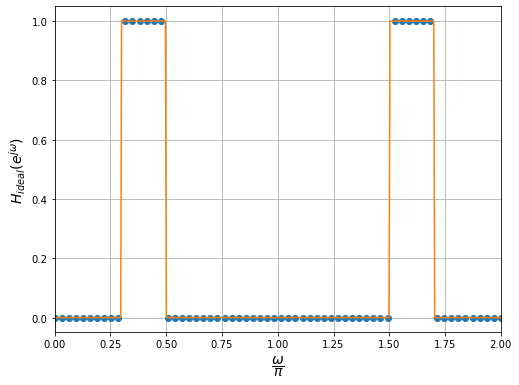

In [19]:
plt.figure(figsize = (8,6))

n = np.linspace(0, 2*np.pi, M)
H = IdealFilter(n)

plt.plot(n/np.pi, H,'o')
plt.plot(np.linspace(0, 2*np.pi, 500)/np.pi, IdealFilter(np.linspace(0, 2*np.pi, 500)))
plt.ylabel(r'$H_{ideal}(e^{j\omega})$', fontstyle = 'italic', fontsize = 14)
plt.xlabel(r"$\dfrac{\omega}{\pi}$", fontstyle = 'italic', fontsize = 14)
plt.xlim(0, 2)
plt.grid()

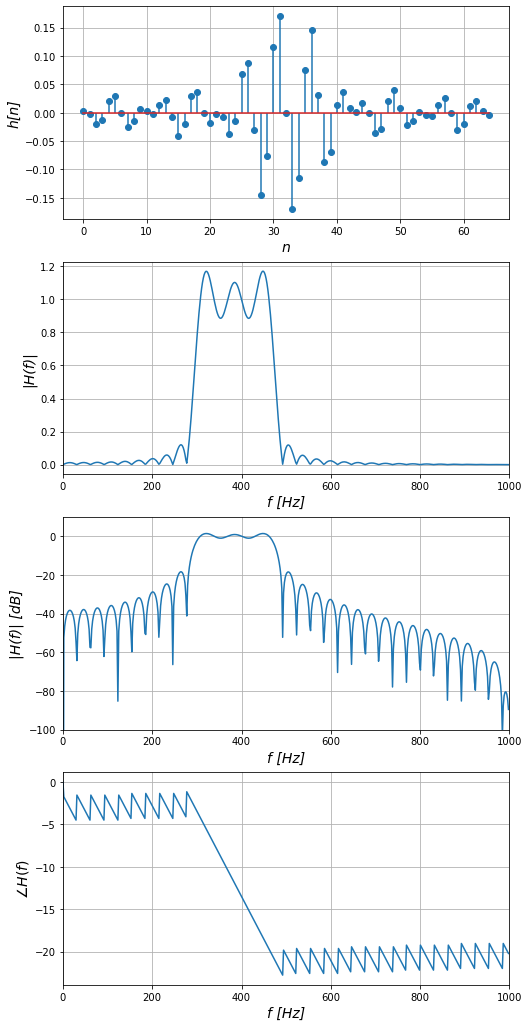

In [20]:
fig, axs = plt.subplots(4, 1, figsize = (8, 18))

h = TypeIII(H, M)
w, Hk = signal.freqz(h)

axs[0].stem(h)
axs[0].set_xlabel("n", fontsize = 14, fontstyle = 'italic')
axs[0].set_ylabel("h[n]", fontsize = 14, fontstyle = 'italic')
axs[0].grid()

axs[1].plot(fs*w/(2*np.pi), abs(Hk))
axs[1].set_xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
axs[1].set_ylabel("|H(f)|", fontsize = 14, fontstyle = 'italic')
axs[1].set_xlim(0, fs/2)
axs[1].grid()

axs[2].plot(fs*w/(2*np.pi), 20*np.log10(abs(Hk)))
axs[2].set_xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
axs[2].set_ylabel("|H(f)| [dB]", fontsize = 14, fontstyle = 'italic')
axs[2].set_xlim(0, fs/2)
axs[2].set_ylim(-100,10)
axs[2].grid()

axs[3].plot(fs*w/(2*np.pi), np.unwrap(np.angle(Hk)))
axs[3].set_xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
axs[3].set_ylabel(r"$\angle H(f)$", fontsize = 14, fontstyle = 'italic')
axs[3].set_xlim(0, fs/2)
axs[3].grid()

### Part 2: Influence of M parameter in the filter response

Consider a lowpass filter from $0$ to $5\ kHz$, the sampling frequency is $18\ kHz$ and $M = 8$. Change the filter order for values of $M$ bigger than $8$ and observe the output. How does the frequency response change when M increases?

In [21]:
fs   = 18000
f_c1 = 0
f_c2 = 5000

ω_c1 = 2*np.pi*f_c1/fs
ω_c2 = 2*np.pi*f_c2/fs

M = [8, 12, 16, 20, 24]

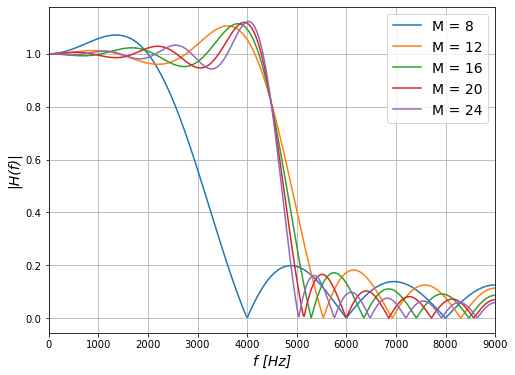

In [22]:
plt.figure(figsize = (8, 6))

for i in range(len(M)):
    n = np.linspace(0, 2*np.pi, M[i])
    H = IdealFilter(n)
    
    h = TypeI(H, M[i])
    w, Hk = signal.freqz(h)
    
    # No domínio das amostras
    #plt.plot(h, label = 'M = '+str(M[i]))
    #plt.xlabel("n", fontsize = 14, fontstyle = 'italic')
    #plt.ylabel("h[n]", fontsize = 14, fontstyle = 'italic')
    #plt.legend(fontsize = 14)
    #plt.grid()
    
    # Amplitude
    plt.plot(fs*w/(2*np.pi), abs(Hk), label = 'M = '+str(M[i]))
    plt.xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
    plt.ylabel("|H(f)|", fontsize = 14, fontstyle = 'italic')
    plt.xlim(0, fs/2)
    plt.legend(fontsize = 14)
    plt.grid()
    
    # Amplitude in dB
    #plt.plot(fs*w/(2*np.pi), 20*np.log10(abs(Hk)), label = 'M = '+str(M[i]))
    #plt.xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
    #plt.ylabel("|H(f)| [dB]", fontsize = 14, fontstyle = 'italic')
    #plt.xlim(0, fs/2)
    #plt.ylim(-80,10)
    #plt.legend(fontsize = 14)
    #plt.grid()

    # Phase
    #plt.plot(fs*w/(2*np.pi), np.unwrap(np.angle(Hk)), label = 'M = '+str(M[i]))
    #plt.xlabel("f [Hz]", fontsize = 14, fontstyle = 'italic')
    #plt.ylabel(r"$\angle H(f)$", fontsize = 14, fontstyle = 'italic')
    #plt.xlim(0, fs/2)
    #plt.legend(fontsize = 14)
    #plt.grid()